## **Bagging and Pasting**

#### **What is Bagging and Pasting?**


(Same model trained with different data)
- **Bagging (Bootstrap Aggregating):**
    - **Sampling with replacement:** In bagging, different training subsets are sampled with replacement. This means that some instances can appear multiple times in the same subset.
    - **Training multiple predictors:** Each predictor is trained on a random subset of the training data. Since the subsets are sampled with replacement, some training instances may be left out of each subset, while others may be repeated.
    - **Prediction aggregation:** For classification, the predictions of the individual models are combined using the mode (most frequent prediction), and for regression, the predictions are averaged. This reduces variance and helps in stabilizing the model's predictions.

- **Pasting:**
    - **Sampling without replacement:** Unlike bagging, pasting involves sampling without replacement, meaning no instance is repeated in a subset.
    - **Training and aggregation:** The process of training predictors and aggregating predictions remains the same as bagging, but with the key difference that pasting does not allow repeated instances within each subset.

    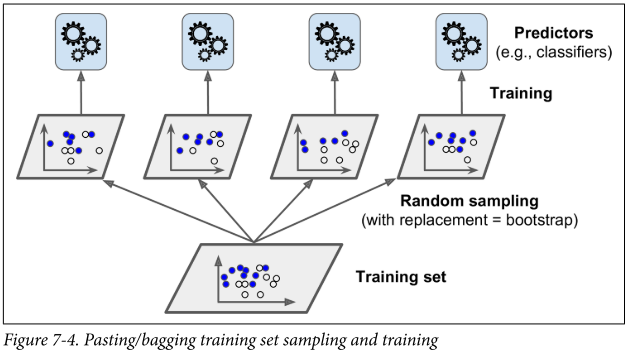

#### **Characteristics**

- **Effect on Bias and Variance:**
    - **Bias:** Each individual model in an ensemble typically has higher bias compared to one trained on the full training set. However, by combining several models, the overall bias of the ensemble remains similar to that of a single model.
    - **Variance:** The main advantage of bagging and pasting is that they reduce the variance of the model, which improves the overall performance by making the predictions more stable.

- **Parallelization:**
    - Both bagging and pasting are highly parallelizable. Since each model is trained independently, they can be trained on different cores or even different machines. This parallelism makes them scalable and efficient, especially when working with large datasets.

#### **Code**

The Scikit-Learn `BaggingClassifier` (or `BaggingRegressor` for regression) provides an easy way to implement bagging (and pasting) using an ensemble of models. Below is an example code that trains an ensemble of 500 Decision Tree classifiers using bagging with 100 randomly sampled instances for each classifier.

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [30]:
X, y=make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
bag_clf=BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
# n_estimators=500 -> 500 decision tree classifier will be used
# n_samples=100 -> each classifier will be trained with 100 random data
# bootstrap=True -> Sampling with replacement(by default True)
# n_jobs=-1 -> Number of parallel jobs to be performed ( -1 means based on availability)
# oob_score=True -> oob_score_ attribute returns a scalar value between 0 and 1, representing the proportion of correctly classified out-of-bag samples.(By default False)

In [32]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [33]:
y_pred=bag_clf.predict(X_test)

**Division by Decision Tree**

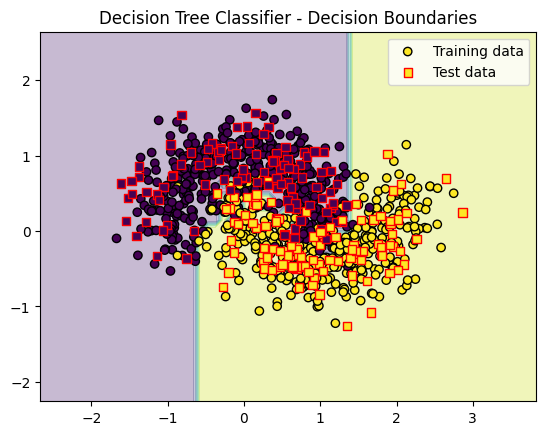

In [34]:
import matplotlib.pyplot as plt
import numpy as np
tree=DecisionTreeClassifier()
tree.fit(X_train, y_train)
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the mesh grid
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', marker='s', label='Test data')

# Labeling the plot
plt.title("Decision Tree Classifier - Decision Boundaries")
plt.legend()

plt.show()

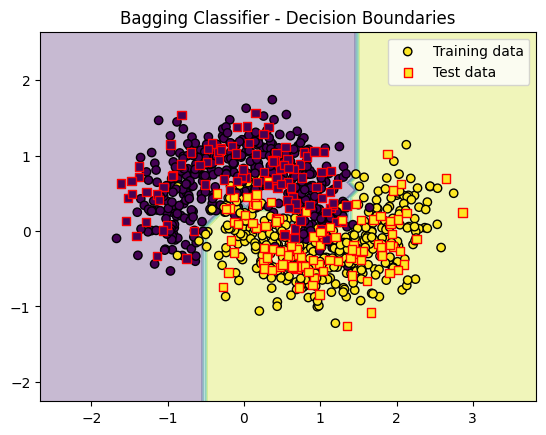

In [35]:
import matplotlib.pyplot as plt
import numpy as np
# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the mesh grid
Z = bag_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='r', marker='s', label='Test data')

# Labeling the plot
plt.title("Bagging Classifier - Decision Boundaries")
plt.legend()

plt.show()

#### **Why Bagging is Ofter Preffered?**

- Bagging often results in better models because the reduction in variance outweighs the slight increase in bias. This leads to a more stable and reliable ensemble.
- Pasting, while generally more efficient in terms of model bias, may not reduce variance as much due to the increased correlation between individual models.

In [36]:
from sklearn.model_selection import cross_val_score
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1)
pasting = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, bootstrap=False, n_jobs=-1)

# Perform cross-validation for Bagging and Pasting
bagging_score = cross_val_score(bagging, X, y, cv=5)
pasting_score = cross_val_score(pasting, X, y, cv=5)

# Print the average accuracy for both methods
print(f'Bagging Average Accuracy: {bagging_score.mean():.4f}')
print(f'Pasting Average Accuracy: {pasting_score.mean():.4f}')

Bagging Average Accuracy: 0.9020
Pasting Average Accuracy: 0.8830


#### **Out-of-Bag Evaluation(OOB)**

- The instances that are not sampled for a given model are called out-of-bag instances. On average, for a training set of size m, about 63% of the instances are sampled for each model, and the remaining 37% are the oob instances.
- The exact set of oob instances will vary from model to model, but for any given model, the instances it does not see during training can be used for evaluating its performance.

- **Advantages**
   1) **No Need for a Separate Validation Set:**
        - One key advantage of using bagging is that you can evaluate the individual models on the oob instances, which effectively gives you a built-in cross-validation method.
        - Since each model is trained on a different subset of the data, the oob instances serve as an independent test set for that particular model.
    2) **Evaluation of the Ensemble:**
        - You can evaluate the ensemble model itself by averaging the performance of each individual model on its corresponding oob instances. This can be used as an estimate of the ensemble's performance.
        - The oob score is particularly useful because it provides a way to assess the ensemble without needing to set aside a separate validation or test set.

In [38]:
#OOB score
bag_clf.oob_score_

0.90625

According to this oob evaluation, this BaggingClassifier is likely to achieve about 90.1% accuracy on the test set. Let’s verify this:

In [39]:
#Accuracy Score
accuracy_score(y_test, y_pred)

0.91

We get 91% accuracy on the test set—close enough!

`oob_decision_function_`:
- This variable provides the decision function (i.e., class probabilities) for each training instance, as predicted by the predictors (models) in the ensemble.
- For classifiers that support predict_proba() (such as decision trees), this will return the predicted class probabilities for each instance, based on the predictions of the individual predictors.

In [41]:
bag_clf.oob_decision_function_

array([[0.02830189, 0.97169811],
       [0.9503386 , 0.0496614 ],
       [0.99313501, 0.00686499],
       ...,
       [0.96179775, 0.03820225],
       [0.69954128, 0.30045872],
       [0.05681818, 0.94318182]])

#### **Random Patches and Random Subspaces**

##### **Random Patches Method:**

- **What it does:** The Random Patches method involves sampling both training instances and features for each base learner (predictor).
    - Instance sampling is controlled by the bootstrap and max_samples parameters (just like in standard bagging).
Feature sampling is controlled by the bootstrap_features and max_features parameters.
- **Effect:** This approach introduces more diversity among the predictors by reducing the number of features each model has access to. As a result, predictors become more diverse, but this can increase bias slightly since each model has less information to work with. However, it can still lead to a lower variance overall, since the predictors are less likely to overfit the same features of the data
- **Use case:** The Random Patches method is especially beneficial when dealing with high-dimensional datasets where using all features might be computationally expensive, or when you want to ensure that the base learners are diverse enough to reduce overfitting.

##### **Random Subspaces Method:**
- **What it does:** The Random Subspaces method involves sampling only the features while using all of the training instances.
    - You achieve this by setting bootstrap=False and max_samples=1.0 (meaning all instances are used), while sampling a random subset of features (controlled by bootstrap_features=True and/or max_features < 1.0).
- **Effect:** This method also increases diversity by reducing the number of features each model has access to. By not varying the training instances, it avoids the potential downsides of reducing the amount of data available for training but still reduces the risk of overfitting through feature diversity.
- **Use case:** The Random Subspaces method can be useful when you have a large number of features but still want each predictor to focus on a small subset of them, especially when features have strong correlations or redundant information.

##### **Hyperparameters:**

- `max_features:` Determines the number of features to sample for each base learner. A smaller value means fewer features are used, leading to more diversity but higher bias.
- `bootstrap_features:` If set to True, features are sampled with replacement; if set to False, features are sampled without replacement.
- `max_samples:` Controls the proportion of training data to sample for each base learner.    
- `bootstrap:` If set to True, instances are sampled with replacement; if set to False, instances are sampled without replacement.